In [9]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [10]:
#create_balanced_no_photos_folder(r"C:\Users\aboui\Downloads\Dataset") 

In [11]:
data_dir = r'./Dataset/MultiClasse'
train_gen, val_gen = prepare_data(data_dir)

input_shape = (224, 224, 3)  
image_size = (224 , 224)
class_names = list(val_gen.class_names)

num_classes = len(class_names)
save_model_path = r"models/mobilenetv2_Multi_best_weights.h5"


Found 41398 files belonging to 5 classes.
Using 33119 files for training.
Found 41398 files belonging to 5 classes.
Using 8279 files for validation.


In [12]:
mobilenet_model = create_mobilenetv2_model(
    input_shape=input_shape,
    class_count=num_classes,
    show_summary=True,
    dropout_rate=0.3,
    fine_tune_at=-1
)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [13]:
history = TrainModel(
    model=mobilenet_model,
    train_set=train_gen,
    test_set=val_gen,
    nbEpochs=100,
    modelCheckpoint=save_model_path
)

Erreur lors du chargement des poids : Cannot assign value to variable ' dense_1/kernel:0': Shape mismatch.The variable shape (1280, 5), and the assigned value shape (1280, 4) are incompatible.
Epoch 1/100
1034/1035 [============================>.] - ETA: 0s - loss: 0.5609 - accuracy: 0.7894
Epoch 1: val_loss improved from inf to 0.24104, saving model to models\mobilenetv2_Multi_best_weights.h5
1035/1035 [==============================] - 57s 52ms/step - loss: 0.5606 - accuracy: 0.7896 - val_loss: 0.2410 - val_accuracy: 0.9235
Epoch 2/100
1035/1035 [==============================] - ETA: 0s - loss: 0.2328 - accuracy: 0.9218
Epoch 2: val_loss improved from 0.24104 to 0.17230, saving model to models\mobilenetv2_Multi_best_weights.h5
1035/1035 [==============================] - 60s 57ms/step - loss: 0.2328 - accuracy: 0.9218 - val_loss: 0.1723 - val_accuracy: 0.9437
Epoch 3/100
1035/1035 [==============================] - ETA: 0s - loss: 0.1831 - accuracy: 0.9380
Epoch 3: val_loss improved

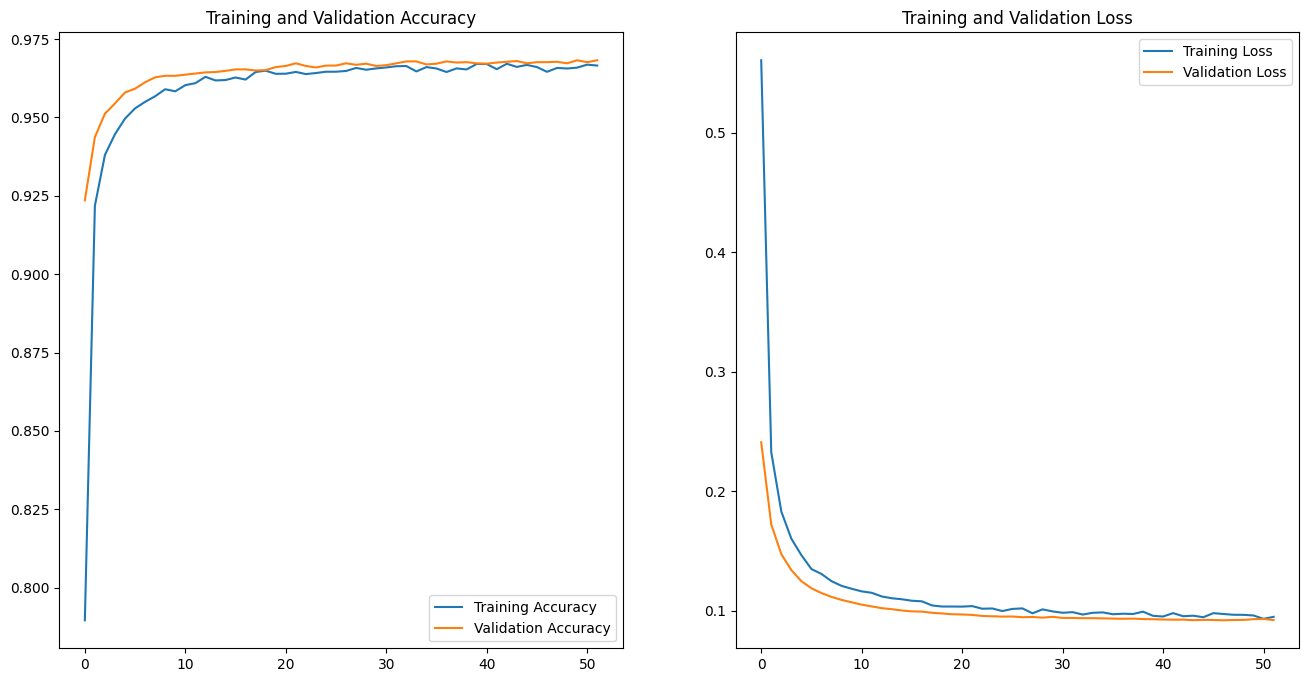

In [14]:
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

1/1 [==============================] - 1s 803ms/step
Vérification des lignes (%): [100. 100. 100. 100. 100.]


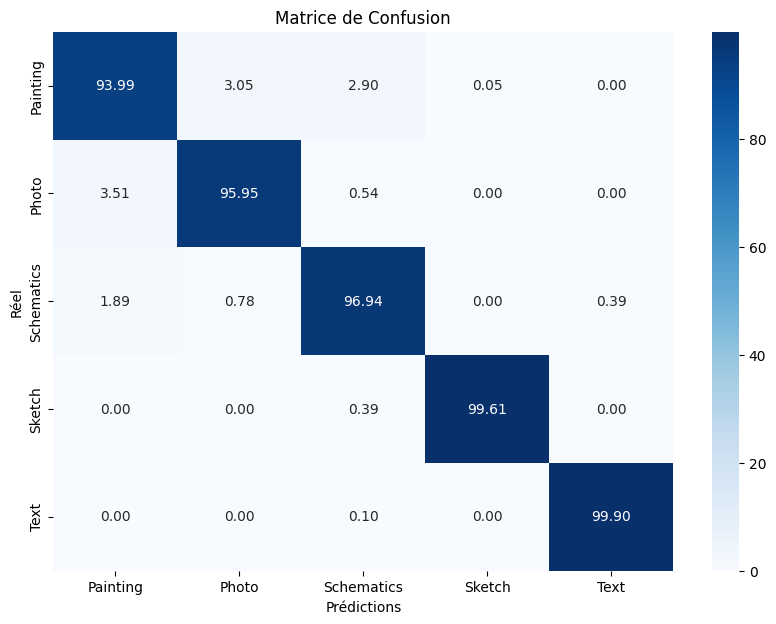

In [15]:
plot_confusion_matrix(mobilenet_model , val_gen , class_names)

259/259 [==============================] - 13s 45ms/step - loss: 0.0921 - accuracy: 0.9676
Évaluation sur le jeu de test - Accuracy: 0.97, Loss: 0.0921
1/1 [==============================] - 1s 792ms/step
Classe prédite: Schematics avec une confiance de 0.72


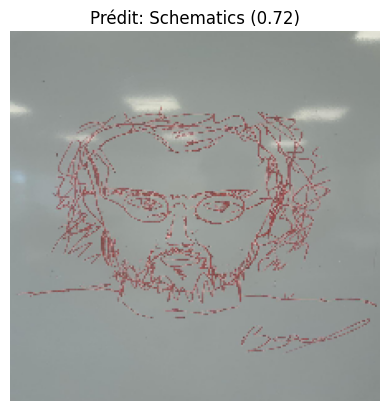

259/259 [==============================] - 12s 46ms/step - loss: 0.0921 - accuracy: 0.9676
Évaluation sur le jeu de test - Accuracy: 0.97, Loss: 0.0921
1/1 [==============================] - 0s 24ms/step
Classe prédite: Photo avec une confiance de 0.98


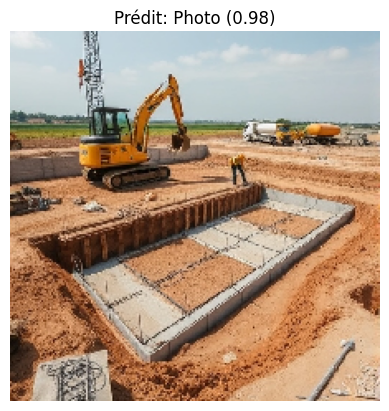

259/259 [==============================] - 12s 47ms/step - loss: 0.0921 - accuracy: 0.9676
Évaluation sur le jeu de test - Accuracy: 0.97, Loss: 0.0921
1/1 [==============================] - 0s 23ms/step
Classe prédite: Photo avec une confiance de 1.00


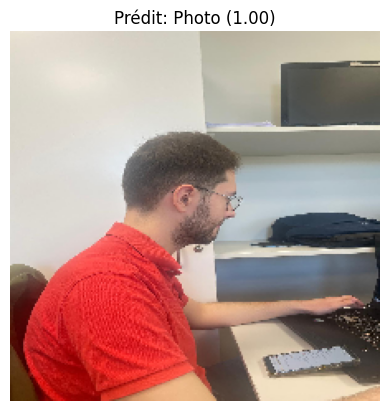

259/259 [==============================] - 49s 189ms/step - loss: 0.0921 - accuracy: 0.9676
Évaluation sur le jeu de test - Accuracy: 0.97, Loss: 0.0921
1/1 [==============================] - 0s 21ms/step
Classe prédite: Schematics avec une confiance de 0.87


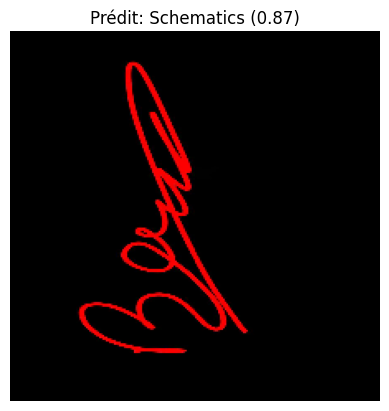

259/259 [==============================] - 11s 43ms/step - loss: 0.0921 - accuracy: 0.9676
Évaluation sur le jeu de test - Accuracy: 0.97, Loss: 0.0921
1/1 [==============================] - 0s 25ms/step
Classe prédite: Schematics avec une confiance de 1.00


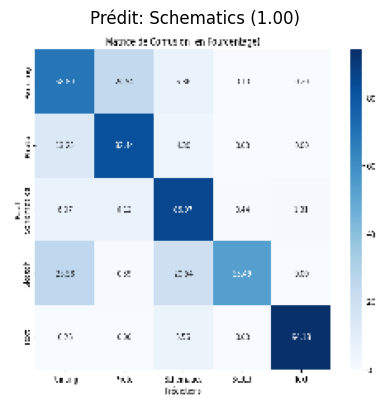

In [16]:
mobilenet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
with tf.device('/GPU:1'):
    mobilenet_model.load_weights(save_model_path)
    test_model(mobilenet_model, val_gen, "testResult/lorenzo.jpg", class_names  , image_size )
    test_model(mobilenet_model, val_gen, "testResult/7b3cb7d3-c8e0-4852-97df-017ceac60c23.jpeg", class_names , image_size)
    test_model(mobilenet_model, val_gen, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_57384aa3.jpg", class_names , image_size)
    test_model(mobilenet_model, val_gen, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(mobilenet_model, val_gen, "testResult/output.png", class_names , image_size)